In [20]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from census import Census

# Census & gmaps API Keys
from config import api_key

##  Data for Harris County, Texas.

In [3]:
# Run Census Search to retrieve data for Harris County 
#initialize count
count = 0
#set year to 2010
c = Census(api_key, year=2010)

print("-----------Processing for year 2010----------------")
#get data for 2010
census_data = c.acs1.get(("NAME", "B01003_001E", "B19013_001E", 
                          "B17001_002E", "B02001_001E",
                          "B02001_002E", "B02001_003E",
                          "B02001_004E", "B02001_005E",
                          "B02001_006E", "B02001_007E",
                          "B07001_001E", "B07001_017E",
                          "B07001_033E", 
                          "B07008_010E", "B05002_001E", "B13002_001E"
                          ), 
                         {'for': 'county:201', 'in': 'state:48'})

# Convert to DataFrame
census_df = pd.DataFrame(census_data)

# Column Renaming
census_df = census_df.rename(columns={"B01003_001E": "Population",
                                      "B19013_001E": "Household Income",
                                      "B17001_002E": "Poverty Count",
                                      "B02001_001E": "Estimate Total",
                                      "B02001_002E": "White alone",
                                      "B02001_003E": "Black or African American",
                                      "B02001_004E": "Indian and Alaska Native",
                                      "B02001_005E": "Asian",
                                      "B02001_006E": "Native Hawaiian and Other Pacific Islander",
                                      "B02001_007E": "Others",
                                      "B07001_001E": "Mobility",
                                      "B07001_017E": "Same House",
                                      "B07001_033E": "Same County",
                                      "B07008_010E": "Divorced",
                                      "B13002_001E": "Total Births",
                                      "NAME": "Name", "state": "State"})
#set the first year on the DF
census_df["Year"] = 2010
#increment count
count += 1

#read data for years 2011 to 2019
for year in range(2011, 2020):
    c = Census(api_key, year=year)
    print(f"-----------Processing for year {year}----------------")
    census_data = c.acs1.get(("NAME", "B01003_001E", "B19013_001E", 
                              "B17001_002E", "B02001_001E",
                              "B02001_002E", "B02001_003E",
                              "B02001_004E", "B02001_005E",
                              "B02001_006E", "B02001_007E",
                              "B07001_001E", "B07001_017E",
                              "B07001_033E",
                              "B07008_010E", "B05002_001E", "B13002_001E"
                          ), 
                         {'for': 'county:201', 'in': 'state:48'})

  
    #write to DF    
    census_df.loc[count,"Population"] = census_data[0]["B01003_001E"]
    census_df.loc[count,"Household Income"] = census_data[0]["B19013_001E"]
    census_df.loc[count,"Poverty Count"] = census_data[0]["B17001_002E"]
    census_df.loc[count,"Estimate Total"] = census_data[0]["B02001_001E"]
    census_df.loc[count,"White alone"] = census_data[0]["B02001_002E"]
    census_df.loc[count,"Black or African American"] = census_data[0]["B02001_003E"]
    census_df.loc[count,"Indian and Alaska Native"] =  census_data[0]["B02001_004E"]
    census_df.loc[count,"Asian"] = census_data[0]["B02001_005E"]
    census_df.loc[count,"Native Hawaiian and Other Pacific Islander"] = census_data[0]["B02001_006E"]
    census_df.loc[count,"Others"] = census_data[0]["B02001_007E"]
    census_df.loc[count,"Mobility"] = census_data[0]["B07001_001E"]
    census_df.loc[count,"Same House"] = census_data[0]["B07001_017E"]
    census_df.loc[count,"Same County"] = census_data[0]["B07001_033E"]
    census_df.loc[count,"Divorced"] = census_data[0]["B07008_010E"]
    census_df.loc[count,"Total Births"] = census_data[0]["B13002_001E"]
    census_df.loc[count,"Name"] = census_data[0]["NAME"]
    census_df.loc[count,"State"] = census_data[0]["state"] 
    census_df.loc[count,"Year"] = round(year,0)
    count += 1

print("-------------------End Processing----------------")
       

# Add in Poverty Rate (Poverty Count / Population)
census_df["Poverty Rate"] = census_df["Poverty Count"].astype(int)/census_df["Population"].astype(int)*100
census_df["Mobility Rate"] = (census_df["Population"] - census_df["Same House"].astype(int))/census_df["Population"].astype(int)*100
census_df["Divorce Rate"] = census_df["Divorced"].astype(int)/census_df["Population"].astype(int)*100
census_df["Birth Rate"] = census_df["Total Births"].astype(int)/census_df["Population"].astype(int)*100
census_df["Outside County"] = census_df["Mobility"] - census_df["Same County"]


# Final DataFrame
census_df = census_df[["Year","State", "Name", "Population", "Household Income", "Poverty Count", 
                       "Poverty Rate", "White alone", "Black or African American", 
                       "Indian and Alaska Native", "Asian",
                       "Native Hawaiian and Other Pacific Islander", "Others",  
                       "Mobility", "Mobility Rate", "Same House", "Same County", "Outside County",
                       "Divorced","Divorce Rate", "Total Births", "Birth Rate"]]

#print DF
census_df

-----------Processing for year 2010----------------
-----------Processing for year 2011----------------
-----------Processing for year 2012----------------
-----------Processing for year 2013----------------
-----------Processing for year 2014----------------
-----------Processing for year 2015----------------
-----------Processing for year 2016----------------
-----------Processing for year 2017----------------
-----------Processing for year 2018----------------
-----------Processing for year 2019----------------
-------------------End Processing----------------


,Year,State,Name,Population,Household Income,Poverty Count,Poverty Rate,White alone,Black or African American,Indian and Alaska Native,...,Others,Mobility,Mobility Rate,Same House,Same County,Outside County,Divorced,Divorce Rate,Total Births,Birth Rate
0,2010.0,48,"Harris County, Texas",4110771.0,50422.0,762573.0,18.550608,2564180.0,777377.0,20822.0,...,420285.0,4047010.0,19.424921,3312257.0,529913.0,3517097.0,260080.0,6.326794,1086422.0,26.428668
1,2011.0,48,"Harris County, Texas",4180894.0,50928.0,811474.0,19.409102,2595185.0,783773.0,16522.0,...,435638.0,4122130.0,18.962141,3388107.0,558805.0,3563325.0,274314.0,6.561133,1092203.0,26.123671
2,2012.0,48,"Harris County, Texas",4253700.0,51289.0,789595.0,18.562546,2707771.0,802756.0,19171.0,...,362599.0,4195904.0,19.136281,3439700.0,551830.0,3644074.0,266184.0,6.257705,1109232.0,26.076874
3,2013.0,48,"Harris County, Texas",4336853.0,52489.0,791956.0,18.261075,2747751.0,815433.0,22609.0,...,368266.0,4270757.0,18.943483,3515302.0,542558.0,3728199.0,266905.0,6.154347,1123040.0,25.895275
4,2014.0,48,"Harris County, Texas",4441370.0,54178.0,766196.0,17.251344,2802876.0,847404.0,20502.0,...,380101.0,4380492.0,18.214425,3632400.0,522417.0,3858075.0,273541.0,6.158933,1150964.0,25.914616
5,2015.0,48,"Harris County, Texas",4538028.0,56629.0,749270.0,16.510916,2899194.0,856485.0,16777.0,...,346921.0,4470429.0,17.754320,3732332.0,496968.0,3973461.0,285559.0,6.292579,1174459.0,25.880382
6,2016.0,48,"Harris County, Texas",4589928.0,56377.0,755013.0,16.449343,2880994.0,874306.0,15178.0,...,392701.0,4517653.0,17.624242,3780988.0,500410.0,4017243.0,287135.0,6.255763,1181107.0,25.732582
7,2017.0,48,"Harris County, Texas",4652980.0,58645.0,740843.0,15.921904,2969448.0,880266.0,18632.0,...,340142.0,4583028.0,17.558339,3835994.0,541125.0,4041903.0,286593.0,6.159343,1194438.0,25.670388
8,2018.0,48,"Harris County, Texas",4698619.0,60232.0,771892.0,16.428061,2868885.0,901166.0,21230.0,...,461642.0,4630308.0,16.409737,3927588.0,512474.0,4117834.0,304310.0,6.476584,1206981.0,25.687995
9,2019.0,48,"Harris County, Texas",4713325.0,61618.0,704885.0,14.955154,2895713.0,901998.0,20316.0,...,436847.0,4650063.0,16.178727,3950769.0,478096.0,4171967.0,295766.0,6.275103,1208146.0,25.632563


## Data for Atlantic County, New Jersey.

In [4]:
# Run Census Search to retrieve data for Atlantic County 
#initialize count
count = 0
#set year to 2010
c = Census(api_key, year=2010)

print("-----------Processing for year 2010----------------")
#get data for 2010
census_data = c.acs1.get(("NAME", "B01003_001E", "B19013_001E", 
                          "B17001_002E", "B02001_001E",
                          "B02001_002E", "B02001_003E",
                          "B02001_004E", "B02001_005E",
                          "B02001_006E", "B02001_007E",
                          "B07001_001E", "B07001_017E",
                          "B07001_033E", 
                          "B07008_010E", "B05002_001E", "B13002_001E"
                          ), 
                         {'for': 'county:001', 'in': 'state:34'})

# Convert to DataFrame
census_df2 = pd.DataFrame(census_data)

# Column Renaming
census_df2 = census_df2.rename(columns={"B01003_001E": "Population",
                                      "B19013_001E": "Household Income",
                                      "B17001_002E": "Poverty Count",
                                      "B02001_001E": "Estimate Total",
                                      "B02001_002E": "White alone",
                                      "B02001_003E": "Black or African American",
                                      "B02001_004E": "Indian and Alaska Native",
                                      "B02001_005E": "Asian",
                                      "B02001_006E": "Native Hawaiian and Other Pacific Islander",
                                      "B02001_007E": "Others",
                                      "B07001_001E": "Mobility",
                                      "B07001_017E": "Same House",
                                      "B07001_033E": "Same County",
                                      "B07008_010E": "Divorced",
                                      "B13002_001E": "Total Births",
                                      "NAME": "Name", "state": "State"})
# set year as 2010 in DF
census_df2["Year"] = 2010
#increment count
count += 1

#get data for years 2011 to 2019
for year in range(2011, 2020):
    c = Census(api_key, year=year)
    print(f"-----------Processing for year {year}----------------")
    census_data = c.acs1.get(("NAME", "B01003_001E", "B19013_001E", 
                              "B17001_002E", "B02001_001E",
                              "B02001_002E", "B02001_003E",
                              "B02001_004E", "B02001_005E",
                              "B02001_006E", "B02001_007E",
                              "B07001_001E", "B07001_017E",
                              "B07001_033E",
                              "B07008_010E", "B05002_001E", "B13002_001E"
                          ), 
                         {'for': 'county:001', 'in': 'state:34'})
  
    # write to DF    
    census_df2.loc[count,"Population"] = census_data[0]["B01003_001E"]
    census_df2.loc[count,"Household Income"] = census_data[0]["B19013_001E"]
    census_df2.loc[count,"Poverty Count"] = census_data[0]["B17001_002E"]
    census_df2.loc[count,"Estimate Total"] = census_data[0]["B02001_001E"]
    census_df2.loc[count,"White alone"] = census_data[0]["B02001_002E"]
    census_df2.loc[count,"Black or African American"] = census_data[0]["B02001_003E"]
    census_df2.loc[count,"Indian and Alaska Native"] =  census_data[0]["B02001_004E"]
    census_df2.loc[count,"Asian"] = census_data[0]["B02001_005E"]
    census_df2.loc[count,"Native Hawaiian and Other Pacific Islander"] = census_data[0]["B02001_006E"]
    census_df2.loc[count,"Others"] = census_data[0]["B02001_007E"]
    census_df2.loc[count,"Mobility"] = census_data[0]["B07001_001E"]
    census_df2.loc[count,"Same House"] = census_data[0]["B07001_017E"]
    census_df2.loc[count,"Same County"] = census_data[0]["B07001_033E"]
    census_df2.loc[count,"Divorced"] = census_data[0]["B07008_010E"]
    census_df2.loc[count,"Total Births"] = census_data[0]["B13002_001E"]
    census_df2.loc[count,"Name"] = census_data[0]["NAME"]
    census_df2.loc[count,"State"] = census_data[0]["state"] 
    census_df2.loc[count,"Year"] = round(year,0)
    count += 1

print("-------------------End Processing----------------")
       

# Add in Poverty Rate (Poverty Count / Population)
census_df2["Poverty Rate"] = census_df2["Poverty Count"].astype(int)/census_df2["Population"].astype(int)*100
census_df2["Mobility Rate"] = (census_df2["Population"] - census_df2["Same House"].astype(int))/census_df2["Population"].astype(int)*100
census_df2["Divorce Rate"] = census_df2["Divorced"].astype(int)/census_df2["Population"].astype(int)*100
census_df2["Birth Rate"] = census_df2["Total Births"].astype(int)/census_df2["Population"].astype(int)*100
census_df2["Outside County"] = census_df2["Mobility"] - census_df2["Same County"]

# Final DataFrame
census_df2 = census_df2[["Year","State", "Name", "Population", "Household Income", "Poverty Count", 
                       "Poverty Rate", "White alone", "Black or African American", 
                       "Indian and Alaska Native", "Asian",
                       "Native Hawaiian and Other Pacific Islander", "Others",  
                       "Mobility", "Mobility Rate", "Same House", "Same County", "Outside County",
                       "Divorced","Divorce Rate", "Total Births", "Birth Rate"]]

#print DF
census_df2

-----------Processing for year 2010----------------
-----------Processing for year 2011----------------
-----------Processing for year 2012----------------
-----------Processing for year 2013----------------
-----------Processing for year 2014----------------
-----------Processing for year 2015----------------
-----------Processing for year 2016----------------
-----------Processing for year 2017----------------
-----------Processing for year 2018----------------
-----------Processing for year 2019----------------
-------------------End Processing----------------


,Year,State,Name,Population,Household Income,Poverty Count,Poverty Rate,White alone,Black or African American,Indian and Alaska Native,...,Others,Mobility,Mobility Rate,Same House,Same County,Outside County,Divorced,Divorce Rate,Total Births,Birth Rate
0,2010.0,34,"Atlantic County, New Jersey",274685.0,52571.0,38193.0,13.904290,184736.0,44005.0,554.0,...,15618.0,272472.0,9.517083,248543.0,14548.0,257924.0,21038.0,7.658955,67282.0,24.494239
1,2011.0,34,"Atlantic County, New Jersey",274338.0,50829.0,35697.0,13.012051,179270.0,44368.0,1822.0,...,18490.0,272327.0,13.930990,236120.0,23277.0,249050.0,23522.0,8.574095,67086.0,24.453776
2,2012.0,34,"Atlantic County, New Jersey",275422.0,51191.0,39381.0,14.298422,183122.0,44567.0,496.0,...,16439.0,273297.0,11.918801,242595.0,20532.0,252765.0,19675.0,7.143583,65094.0,23.634278
3,2013.0,34,"Atlantic County, New Jersey",275862.0,52127.0,48716.0,17.659554,189499.0,41824.0,394.0,...,12457.0,273622.0,11.866440,243127.0,18610.0,255012.0,21233.0,7.696964,64660.0,23.439256
4,2014.0,34,"Atlantic County, New Jersey",275209.0,55313.0,41785.0,15.183006,186325.0,43439.0,404.0,...,10983.0,272842.0,12.369145,241168.0,20878.0,251964.0,24457.0,8.886701,63421.0,23.044668
5,2015.0,34,"Atlantic County, New Jersey",274219.0,54052.0,38494.0,14.037685,185429.0,40528.0,715.0,...,13868.0,271356.0,12.360559,240324.0,17755.0,253601.0,21582.0,7.870352,63751.0,23.248207
6,2016.0,34,"Atlantic County, New Jersey",270991.0,56778.0,38021.0,14.030355,176909.0,41557.0,824.0,...,20986.0,267666.0,15.317114,229483.0,27023.0,240643.0,19524.0,7.204667,62180.0,22.945411
7,2017.0,34,"Atlantic County, New Jersey",269918.0,61777.0,39172.0,14.512556,174454.0,38933.0,1934.0,...,22087.0,266439.0,16.120822,226405.0,22374.0,244065.0,21377.0,7.919813,60499.0,22.413844
8,2018.0,34,"Atlantic County, New Jersey",265429.0,61212.0,33538.0,12.635394,173409.0,37050.0,557.0,...,22107.0,262760.0,14.854820,226000.0,24341.0,238419.0,20781.0,7.829212,58870.0,22.179189
9,2019.0,34,"Atlantic County, New Jersey",263670.0,63389.0,28609.0,10.850305,168846.0,37184.0,795.0,...,25667.0,260250.0,11.521599,233291.0,17121.0,243129.0,22636.0,8.584974,57895.0,21.957371


## National level Data (US) for comparison

In [5]:
# Run Census Search to retrieve data on country level
#initialize count
count = 0
#set year to 2010
c = Census(api_key, year=2010)

print("-----------Processing for year 2010----------------")
# get data for 2010
census_data = c.acs1.get(("NAME", "B01003_001E", "B19013_001E", 
                          "B17001_002E", "B02001_001E",
                          "B02001_002E", "B02001_003E",
                          "B02001_004E", "B02001_005E",
                          "B02001_006E", "B02001_007E",
                          "B07001_001E", "B07001_017E",
                          "B07001_033E", 
                          "B07008_010E", "B05002_001E", "B13002_001E"
                          ), 
                         {'for': 'us:1'})

# Convert to DataFrame
census_dfus = pd.DataFrame(census_data)

# Column Reordering
census_dfus = census_dfus.rename(columns={"B01003_001E": "Population",
                                      "B19013_001E": "Household Income",
                                      "B17001_002E": "Poverty Count",
                                      "B02001_001E": "Estimate Total",
                                      "B02001_002E": "White alone",
                                      "B02001_003E": "Black or African American",
                                      "B02001_004E": "Indian and Alaska Native",
                                      "B02001_005E": "Asian",
                                      "B02001_006E": "Native Hawaiian and Other Pacific Islander",
                                      "B02001_007E": "Others",
                                      "B07001_001E": "Mobility",
                                      "B07001_017E": "Same House",
                                      "B07001_033E": "Same County",
                                      "B07008_010E": "Divorced",
                                      "B13002_001E": "Total Births",
                                      "NAME": "Name", "state": "State"})
#set date for fisrt row of DF to 2010
census_dfus["Year"] = 2010
#increment count
count += 1
#get data for years 2011 to 2019
for year in range(2011, 2020):
    c = Census(api_key, year=year)
    print(f"-----------Processing for year {year}----------------")
    census_data = c.acs1.get(("NAME", "B01003_001E", "B19013_001E", 
                              "B17001_002E", "B02001_001E",
                              "B02001_002E", "B02001_003E",
                              "B02001_004E", "B02001_005E",
                              "B02001_006E", "B02001_007E",
                              "B07001_001E", "B07001_017E",
                              "B07001_033E",
                              "B07008_010E", "B05002_001E", "B13002_001E"
                          ), 
                         {'for': 'us:1'})
    
    #write to DF
    census_dfus.loc[count,"Population"] = census_data[0]["B01003_001E"]
    census_dfus.loc[count,"Household Income"] = census_data[0]["B19013_001E"]
    census_dfus.loc[count,"Poverty Count"] = census_data[0]["B17001_002E"]
    census_dfus.loc[count,"Estimate Total"] = census_data[0]["B02001_001E"]
    census_dfus.loc[count,"White alone"] = census_data[0]["B02001_002E"]
    census_dfus.loc[count,"Black or African American"] = census_data[0]["B02001_003E"]
    census_dfus.loc[count,"Indian and Alaska Native"] =  census_data[0]["B02001_004E"]
    census_dfus.loc[count,"Asian"] = census_data[0]["B02001_005E"]
    census_dfus.loc[count,"Native Hawaiian and Other Pacific Islander"] = census_data[0]["B02001_006E"]
    census_dfus.loc[count,"Others"] = census_data[0]["B02001_007E"]
    census_dfus.loc[count,"Mobility"] = census_data[0]["B07001_001E"]
    census_dfus.loc[count,"Same House"] = census_data[0]["B07001_017E"]
    census_dfus.loc[count,"Same County"] = census_data[0]["B07001_033E"]
    census_dfus.loc[count,"Divorced"] = census_data[0]["B07008_010E"]
    census_dfus.loc[count,"Total Births"] = census_data[0]["B13002_001E"]
    census_dfus.loc[count,"Name"] = census_data[0]["NAME"]
    census_dfus.loc[count,"Year"] = round(year,0)
    count += 1

print("-------------------End Processing----------------")
       

# Add in Poverty Rate (Poverty Count / Population)
census_dfus["Poverty Rate"] = census_dfus["Poverty Count"].astype(int)/census_dfus["Population"].astype(int)*100
census_dfus["Mobility Rate"] = (census_dfus["Population"] - census_dfus["Same House"].astype(int))/census_dfus["Population"].astype(int)*100
census_dfus["Birth Rate"] = census_dfus["Total Births"].astype(int)/census_dfus["Population"].astype(int)*100
census_dfus["Divorce Rate"] = census_dfus["Divorced"].astype(int)/census_dfus["Population"].astype(int)*100
census_dfus["Outside County"] = census_dfus["Mobility"] - census_dfus["Same County"]

# Final DataFrame
census_dfus = census_dfus[["Year", "Name", "Population", "Household Income", "Poverty Count", 
                       "Poverty Rate", "White alone", "Black or African American", 
                       "Indian and Alaska Native", "Asian",
                       "Native Hawaiian and Other Pacific Islander", "Others",  
                       "Mobility","Mobility Rate", "Same House", "Same County", "Outside County",
                       "Divorced", "Divorce Rate", "Total Births", "Birth Rate"]]

#print DF
census_dfus

-----------Processing for year 2010----------------
-----------Processing for year 2011----------------
-----------Processing for year 2012----------------
-----------Processing for year 2013----------------
-----------Processing for year 2014----------------
-----------Processing for year 2015----------------
-----------Processing for year 2016----------------
-----------Processing for year 2017----------------
-----------Processing for year 2018----------------
-----------Processing for year 2019----------------
-------------------End Processing----------------


,Year,Name,Population,Household Income,Poverty Count,Poverty Rate,White alone,Black or African American,Indian and Alaska Native,Asian,...,Others,Mobility,Mobility Rate,Same House,Same County,Outside County,Divorced,Divorce Rate,Total Births,Birth Rate
0,2010.0,United States,309349689.0,50046.0,46215956.0,14.939713,229397472.0,38874625.0,2553566.0,14728302.0,...,14889440.0,305628607.0,16.420686,258552348.0,28850018.0,276778589.0,22467454.0,7.262802,76352003.0,24.681455
1,2011.0,United States,311591919.0,50502.0,48452035.0,15.549837,230838975.0,39189528.0,2547006.0,15020419.0,...,14768156.0,307900319.0,16.208377,261087925.0,28308564.0,279591755.0,22869772.0,7.339655,76202126.0,24.455745
2,2012.0,United States,313914040.0,51371.0,48760123.0,15.532954,231992377.0,39623138.0,2563505.0,15555530.0,...,14562678.0,310212755.0,16.023955,263612596.0,27913580.0,282299175.0,23504841.0,7.487668,76187270.0,24.270106
3,2013.0,United States,316128839.0,52250.0,48810868.0,15.440182,232969901.0,39919371.0,2521131.0,16012120.0,...,14811025.0,312432820.0,16.027468,265461391.0,27759420.0,284673400.0,23567714.0,7.455098,76129362.0,24.081752
4,2014.0,United States,318857056.0,53657.0,48208387.0,15.119122,233963128.0,40379066.0,2601714.0,16686960.0,...,15063263.0,315095393.0,15.903500,268147625.0,27290363.0,287805030.0,23939561.0,7.507929,76395472.0,23.959160
5,2015.0,United States,321418821.0,55775.0,46153077.0,14.359171,234940100.0,40695277.0,2597249.0,17273777.0,...,15375942.0,317635720.0,15.725720,270873397.0,26861062.0,290774658.0,24358314.0,7.578372,76551119.0,23.816626
6,2016.0,United States,323127515.0,57617.0,44268996.0,13.700163,234644039.0,40893369.0,2676399.0,17556935.0,...,16334352.0,319361956.0,15.618421,272660098.0,26584001.0,292777955.0,24446842.0,7.565695,76483611.0,23.669792
7,2017.0,United States,325719178.0,60336.0,42583651.0,13.073732,235507457.0,41393491.0,2726278.0,18215328.0,...,16552940.0,321994428.0,15.288682,275921008.0,25960510.0,296033918.0,24605090.0,7.554081,76791565.0,23.576004
8,2018.0,United States,327167439.0,61937.0,41852315.0,12.792323,236173020.0,41617764.0,2801587.0,18415198.0,...,16253785.0,323531965.0,15.003929,278079469.0,25406210.0,298125755.0,24832923.0,7.590279,76857068.0,23.491662
9,2019.0,United States,328239523.0,65712.0,39490096.0,12.030878,236475401.0,41989671.0,2847336.0,18636984.0,...,16352553.0,324665523.0,14.591898,280343146.0,24512131.0,300153392.0,25271314.0,7.699047,76879571.0,23.421790


## Charts for Atlantic County, New Jersey.

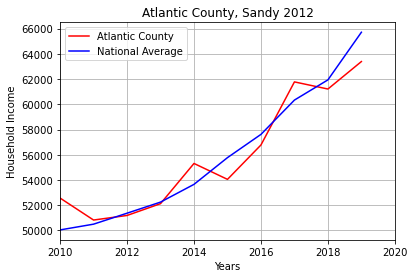

In [6]:
# Plot the Household Income
years = census_df2["Year"]
income_ac = census_df2["Household Income"]
income_us = census_dfus["Household Income"]
line_ac = plt.plot(years, income_ac, color="red", label="Atlantic County" )
line_us = plt.plot(years, income_us, color="blue", label="National Average" )


# Create a legend for our chart
plt.legend(handles=[line_ac[0], line_us[0]], loc="best")

# Add labels to the x and y axes
plt.title("Atlantic County, Sandy 2012")
plt.xlabel("Years")
plt.ylabel("Household Income")

#add grid and set limit for x-axis
plt.grid()
plt.xlim(2010, 2020)

# Show the chart
plt.show()

#### No Correlation between household income  and storm.

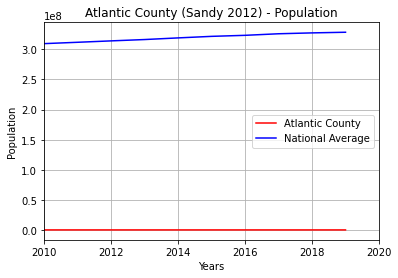

In [7]:
# Plot the Population
years = census_df2["Year"]
pop_ac = census_df2["Population"]
pop_us = census_dfus["Population"]
line_ac = plt.plot(years, pop_ac, color="red", label="Atlantic County" )
line_us = plt.plot(years, pop_us, color="blue", label="National Average" )


# Create a legend for our chart
plt.legend(handles=[line_ac[0], line_us[0]], loc="best")

# Add labels to the x and y axes
plt.title("Atlantic County (Sandy 2012) - Population")
plt.xlabel("Years")
plt.ylabel("Population")

#add grid and set limit for x-axis
plt.grid()
plt.xlim(2010, 2020)

# Show the chart
plt.show()

#### No Correlation between population numbers and storm.

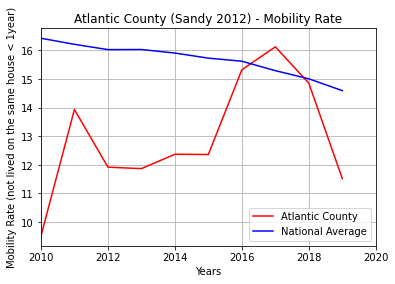

In [8]:
# Plot the rate at which people move out (not lived on the same house < 1year)
years = census_df2["Year"]
mob_ac = census_df2["Mobility Rate"]
mob_us = census_dfus["Mobility Rate"]
line_ac = plt.plot(years, mob_ac, color="red", label="Atlantic County" )
line_us = plt.plot(years, mob_us, color="blue", label="National Average" )

# Create a legend for our chart
plt.legend(handles=[line_ac[0], line_us[0]], loc="best")

# Add labels to the x and y axes
plt.title("Atlantic County (Sandy 2012) - Mobility Rate")
plt.xlabel("Years")
plt.ylabel("Mobility Rate (not lived on the same house < 1year)")

#add grid and set limit for x-axis
plt.grid()
plt.xlim(2010, 2020)

# Show the chart
plt.show()

#### Mobility Rate did dip 2012, with no significant increase till after 2014. But that could be due to the housing market corrections after housing market crash and unrealted to the storm.

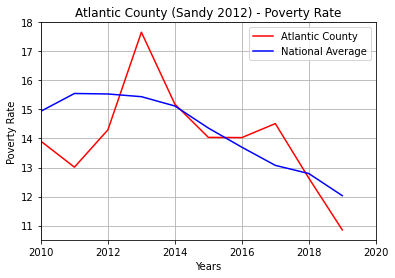

In [9]:
# Plot the world average as a line chart
years = census_df2["Year"]
poverty_ac = census_df2["Poverty Rate"]
poverty_us = census_dfus["Poverty Rate"]
line_ac = plt.plot(years, poverty_ac, color="red", label="Atlantic County" )
line_us = plt.plot(years, poverty_us, color="blue", label="National Average" )

# Create a legend for our chart
plt.legend(handles=[line_ac[0], line_us[0]], loc="best")

# Add labels to the x and y axes
plt.title("Atlantic County (Sandy 2012) - Poverty Rate")
plt.xlabel("Years")
plt.ylabel("Poverty Rate")

#add grid and set limit for x-axis
plt.grid()
plt.xlim(2010, 2020)

# Show the chart
plt.show()

#### Poverty Rate did dip 2012shows a spike between 2012 and 2014.

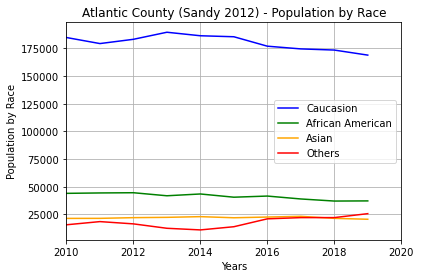

In [10]:
# Plot the world average as a line chart
years = census_df2["Year"]
w_ac = census_df2["White alone"]
b_ac = census_df2["Black or African American"]
a_ac = census_df2["Asian"]
o_ac = census_df2["Others"]
linew_ac = plt.plot(years, w_ac, color="blue", label="Caucasion")
lineb_ac = plt.plot(years, b_ac, color="green", label="African American" )
linea_ac = plt.plot(years, a_ac, color="orange", label="Asian")
lineo_ac = plt.plot(years, o_ac, color="red", label="Others")


# Create a legend for our chart
plt.legend(handles=[linew_ac[0], lineb_ac[0], linea_ac[0], lineo_ac[0]], loc="best")

# Add labels to the x and y axes
plt.title("Atlantic County (Sandy 2012) - Population by Race")
plt.xlabel("Years")
plt.ylabel("Population by Race")

#add grid and set limit for x-axis
plt.grid()
plt.xlim(2010, 2020)

# Show the chart
plt.show()

#### No conclusions 

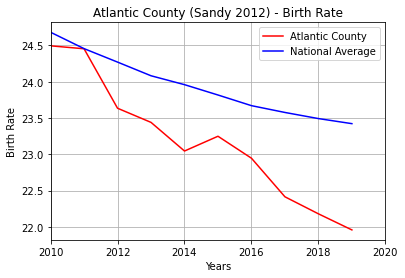

In [11]:
# Plot the world average as a line chart
years = census_df2["Year"]
birth_ac = census_df2["Birth Rate"]
birth_us = census_dfus["Birth Rate"]
line_ac = plt.plot(years, birth_ac, color="red", label="Atlantic County" )
line_us = plt.plot(years, birth_us, color="blue", label="National Average" )

# Create a legend for our chart
plt.legend(handles=[line_ac[0], line_us[0]], loc="best")

# Add labels to the x and y axes
plt.title("Atlantic County (Sandy 2012) - Birth Rate")
plt.xlabel("Years")
plt.ylabel("Birth Rate")

#add grid and set limit for x-axis
plt.grid()
plt.xlim(2010, 2020)

# Show the chart
plt.show()

#### No conclusions 

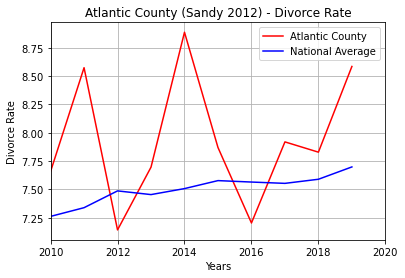

In [12]:
# Plot the Divorce Rate
years = census_df2["Year"]
d_ac = census_df2["Divorce Rate"]
d_us = census_dfus["Divorce Rate"]
line_ac = plt.plot(years, d_ac, color="red", label="Atlantic County" )
line_us = plt.plot(years, d_us, color="blue", label="National Average" )

# Create a legend for our chart
plt.legend(handles=[line_ac[0], line_us[0]], loc="best")

# Add labels to the x and y axes
plt.title("Atlantic County (Sandy 2012) - Divorce Rate")
plt.xlabel("Years")
plt.ylabel("Divorce Rate")

#add grid and set limit for x-axis
plt.grid()
plt.xlim(2010, 2020)

# Show the chart
plt.show()

#### No conclusions 

## Charts for Harris County, Texas.

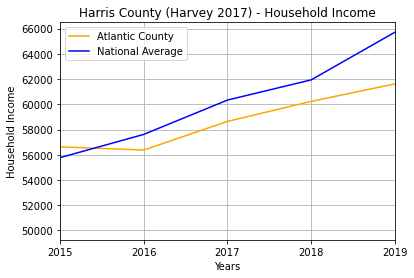

In [13]:
# Plot the Household Income
years = census_df2["Year"]
income_ac = census_df["Household Income"]
income_us = census_dfus["Household Income"]
line_ac = plt.plot(years, income_ac, color="orange", label="Atlantic County" )
line_us = plt.plot(years, income_us, color="blue", label="National Average" )


# Create a legend for our chart
plt.legend(handles=[line_ac[0], line_us[0]], loc="best")

# Add labels to the x and y axes
plt.title("Harris County (Harvey 2017) - Household Income")
plt.xlabel("Years")
plt.ylabel("Household Income")

#add grid and set limit for x-axis
plt.grid()
plt.xlim(2015, 2019)
x_ticks = np.arange(2015, 2020, 1)
plt.xticks(x_ticks)

# Show the chart
plt.show()


#### No Correlation between household income  and storm.

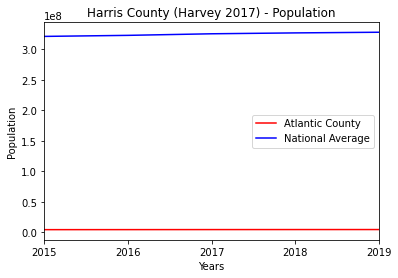

In [14]:
# Plot the Population
years = census_df["Year"]
pop_ac = census_df["Population"]
pop_us = census_dfus["Population"]
line_ac = plt.plot(years, pop_ac, color="red", label="Atlantic County" )
line_us = plt.plot(years, pop_us, color="blue", label="National Average" )


# Create a legend for our chart
plt.legend(handles=[line_ac[0], line_us[0]], loc="best")

# Add labels to the x and y axes
plt.title("Harris County (Harvey 2017) - Population")
plt.xlabel("Years")
plt.ylabel("Population")

#add grid and set limit for x-axis
plt.xlim(2015, 2019)
x_ticks = np.arange(2015, 2020, 1)
plt.xticks(x_ticks)

# Show the chart
plt.show()

#### No Correlation between population numbers and storm.

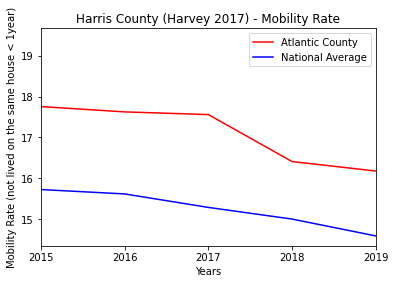

In [15]:
# Plot the rate at which people move out (not lived on the same house < 1year)
years = census_df["Year"]
mob_ac = census_df["Mobility Rate"]
mob_us = census_dfus["Mobility Rate"]
line_ac = plt.plot(years, mob_ac, color="red", label="Atlantic County" )
line_us = plt.plot(years, mob_us, color="blue", label="National Average" )

# Create a legend for our chart
plt.legend(handles=[line_ac[0], line_us[0]], loc="best")

# Add labels to the x and y axes
plt.title("Harris County (Harvey 2017) - Mobility Rate")
plt.xlabel("Years")
plt.ylabel("Mobility Rate (not lived on the same house < 1year)")

#add grid and set limit for x-axis
plt.xlim(2015, 2019)
x_ticks = np.arange(2015, 2020, 1)
plt.xticks(x_ticks)

# Show the chart
plt.show()

#### No conclusions 

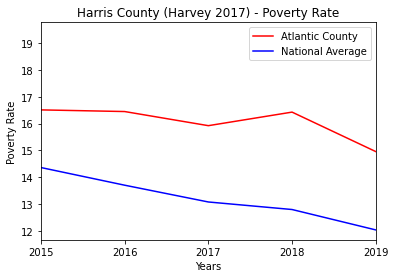

In [16]:
# Plot the world average as a line chart
years = census_df["Year"]
poverty_ac = census_df["Poverty Rate"]
poverty_us = census_dfus["Poverty Rate"]
line_ac = plt.plot(years, poverty_ac, color="red", label="Atlantic County" )
line_us = plt.plot(years, poverty_us, color="blue", label="National Average" )

# Create a legend for our chart
plt.legend(handles=[line_ac[0], line_us[0]], loc="best")

# Add labels to the x and y axes
plt.title("Harris County (Harvey 2017) - Poverty Rate")
plt.xlabel("Years")
plt.ylabel("Poverty Rate")

#add grid and set limit for x-axis
plt.xlim(2015, 2019)
x_ticks = np.arange(2015, 2020, 1)
plt.xticks(x_ticks)

# Show the chart
plt.show()

#### Slight increase in poverty rate after the storm. 

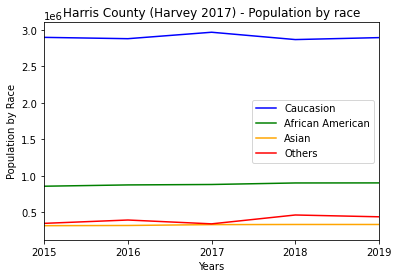

In [17]:
# Plot the world average as a line chart
years = census_df["Year"]
w_ac = census_df["White alone"]
b_ac = census_df["Black or African American"]
a_ac = census_df["Asian"]
o_ac = census_df["Others"]
linew_ac = plt.plot(years, w_ac, color="blue", label="Caucasion")
lineb_ac = plt.plot(years, b_ac, color="green", label="African American" )
linea_ac = plt.plot(years, a_ac, color="orange", label="Asian")
lineo_ac = plt.plot(years, o_ac, color="red", label="Others")


# Create a legend for our chart
plt.legend(handles=[linew_ac[0], lineb_ac[0], linea_ac[0], lineo_ac[0]], loc="best")

# Add labels to the x and y axes
plt.title("Harris County (Harvey 2017) - Population by race")
plt.xlabel("Years")
plt.ylabel("Population by Race")

#add grid and set limit for x-axis
plt.xlim(2015, 2019)
x_ticks = np.arange(2015, 2020, 1)
plt.xticks(x_ticks)

# Show the chart
plt.show()

#### No conclusions 

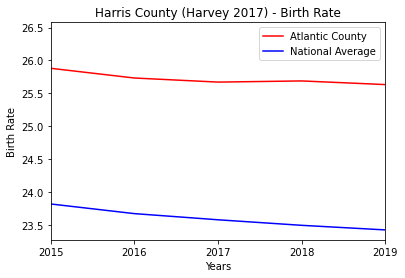

In [18]:
# Plot the world average as a line chart
years = census_df["Year"]
birth_ac = census_df["Birth Rate"]
birth_us = census_dfus["Birth Rate"]
line_ac = plt.plot(years, birth_ac, color="red", label="Atlantic County" )
line_us = plt.plot(years, birth_us, color="blue", label="National Average" )

# Create a legend for our chart
plt.legend(handles=[line_ac[0], line_us[0]], loc="best")

# Add labels to the x and y axes
plt.title("Harris County (Harvey 2017) - Birth Rate")
plt.xlabel("Years")
plt.ylabel("Birth Rate")

#add grid and set limit for x-axis
plt.xlim(2015, 2019)
x_ticks = np.arange(2015, 2020, 1)
plt.xticks(x_ticks)

# Show the chart
plt.show()

#### No conclusions 

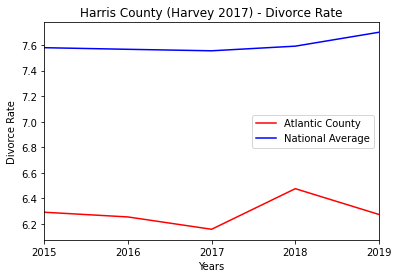

In [19]:
# Plot the Divorce Rate
years = census_df["Year"]
d_ac = census_df["Divorce Rate"]
d_us = census_dfus["Divorce Rate"]
line_ac = plt.plot(years, d_ac, color="red", label="Atlantic County" )
line_us = plt.plot(years, d_us, color="blue", label="National Average" )

# Create a legend for our chart
plt.legend(handles=[line_ac[0], line_us[0]], loc="best")

# Add labels to the x and y axes
plt.title("Harris County (Harvey 2017) - Divorce Rate")
plt.xlabel("Years")
plt.ylabel("Divorce Rate")

#add grid and set limit for x-axis
plt.xlim(2015, 2019)
x_ticks = np.arange(2015, 2020, 1)
plt.xticks(x_ticks)

# Show the chart
plt.show()

#### No conclusions 